In [374]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from google.colab import drive
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [408]:
path = '/content/drive/MyDrive/Colab Notebooks/BBDD/hotel_bookings.csv'
df = pd.read_csv(path)

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [410]:
# Limpieza de espacios
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [411]:
# Usamos describe para identificar anormalidad en los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [412]:
# Identificar si estan correctos los tipos
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


Revision de columnas de objetos

In [413]:
df["hotel"].value_counts()

,count
hotel,
City Hotel,79330
Resort Hotel,40060


In [414]:
df["arrival_date_month"].value_counts()

,count
arrival_date_month,
August,13877
July,12661
May,11791
October,11160
April,11089
June,10939
September,10508
March,9794
February,8068


In [415]:
df["meal"].value_counts()

,count
meal,
BB,92310
HB,14463
SC,10650
Undefined,1169
FB,798


In [416]:
df["country"].value_counts()

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
ITA,3766
IRL,3375
BEL,2342
BRA,2224


In [417]:
df["market_segment"].value_counts()

,count
market_segment,
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


In [418]:
df["customer_type"].value_counts()

,count
customer_type,
Transient,89613
Transient-Party,25124
Contract,4076
Group,577


In [419]:
df["market_segment"].value_counts()

,count
market_segment,
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


In [420]:
df["reservation_status"].value_counts()

,count
reservation_status,
Check-Out,75166
Canceled,43017
No-Show,1207


In [421]:
# Bastante sospechoso No Deposit pero sigue siendo dato por lo cual se dejara
df["deposit_type"].value_counts()

,count
deposit_type,
No Deposit,104641
Non Refund,14587
Refundable,162


In [422]:
# Buscar duplicado
df.duplicated().sum()

np.int64(31994)

In [423]:
# Eliminar duplicado
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

# Se revisar reservation_status_date

In [425]:
# Verificar typos
df["reservation_status_date"].dtype

dtype('O')

In [426]:
# Pasar a object a to_datetime
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [427]:
df["reservation_status_date"].dtype

dtype('<M8[ns]')

# Buscar nan

In [428]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [429]:
df["country"].isnull().sum()

np.int64(452)

In [430]:
# Quitar limite de columna para mejorar analisis y enocntrar los nan y analisar nan para posible solucion
pd.set_option('display.max_columns', None)
filas_con_nan = df[df["country"].isnull()]
filas_con_nan

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.00,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.00,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.00,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.00,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.00,0,0,Canceled,2016-10-13
9376,Resort Hotel,1,0,2016,November,48,21,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,386.0,0,Group,0.00,0,0,Canceled,2016-11-21
9610,Resort Hotel,1,4,2016,December,52,20,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,D,0,No Deposit,NaN,204.0,0,Transient,30.00,0,2,Canceled,2016-12-19
11262,Resort Hotel,1,87,2017,April,18,30,2,3,2,0.0,0,BB,NaN,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,48.00,0,0,Canceled,2017-02-02
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,1,A,D,0,No Deposit,94.0,NaN,0,Transient,27.00,0,0,Check-Out,2016-01-15
13804,Resort Hotel,0,7,2016,January,4,18,1,3,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,2,A,A,0,No Deposit,NaN,94.0,0,Transient,28.50,1,0,Check-Out,2016-01-22


In [431]:
# Revision de valores y quitar limite de filas
pd.set_option('display.max_rows', None)
df['country'].value_counts()

,count
country,
PRT,27453
GBR,10433
FRA,8837
ESP,7252
DEU,5387
ITA,3066
IRL,3016
BEL,2081
BRA,1995


In [432]:
# Se quita espacio por hay alguno repetido
df['country'] = df['country'].str.strip()
df['country'].value_counts()

,count
country,
PRT,27453
GBR,10433
FRA,8837
ESP,7252
DEU,5387
ITA,3066
IRL,3016
BEL,2081
BRA,1995


Analisando una solucion para los nan (452) se reemplazara con el pais que tiene mas demanda de hoteles que seria PRT , ya que si se imputa a este pais no afecta el analisis ya que seguira siendo el mas alto

In [433]:
df['country'] = df['country'].fillna('PRT')
df['country'].isnull().sum()

np.int64(0)

# Resolver los nan de agent

In [434]:
filas_con_nan = df[df["agent"].isnull()].head(10)
filas_con_nan

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.00,0,2,Check-Out,2015-07-15
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.30,0,2,Canceled,2015-05-29
42,Resort Hotel,0,16,2015,July,27,2,2,3,2,0.0,0,BB,ESP,Direct,Direct,0,0,0,F,F,0,No Deposit,NaN,NaN,0,Transient,123.00,0,0,Check-Out,2015-07-07
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,2.0,0,BB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,1,2,Check-Out,2015-07-03
56,Resort Hotel,0,0,2015,July,27,2,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,H,H,0,No Deposit,NaN,NaN,0,Transient,147.00,0,0,Check-Out,2015-07-03


In [435]:
# Ya que no se puede obtener este dato se rellenara por la moda osea la que mas se repitio
df['agent'] = df['agent'].fillna(df['agent'].mode()[0])

In [436]:
df['agent'].isnull().sum()

np.int64(0)

# Resolver los datos nan de company

In [437]:
num_null_agent = df['company'].isnull().sum()
num_null_agent

np.int64(82137)

El 93.99% de esta columna esta null por lo cual se eliminara

In [438]:
df = df.drop(columns=['company'])

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87392 non-null  float64       
 11  babies

# Dataframe limpio

# Visualizaciones exploratorias univariadas

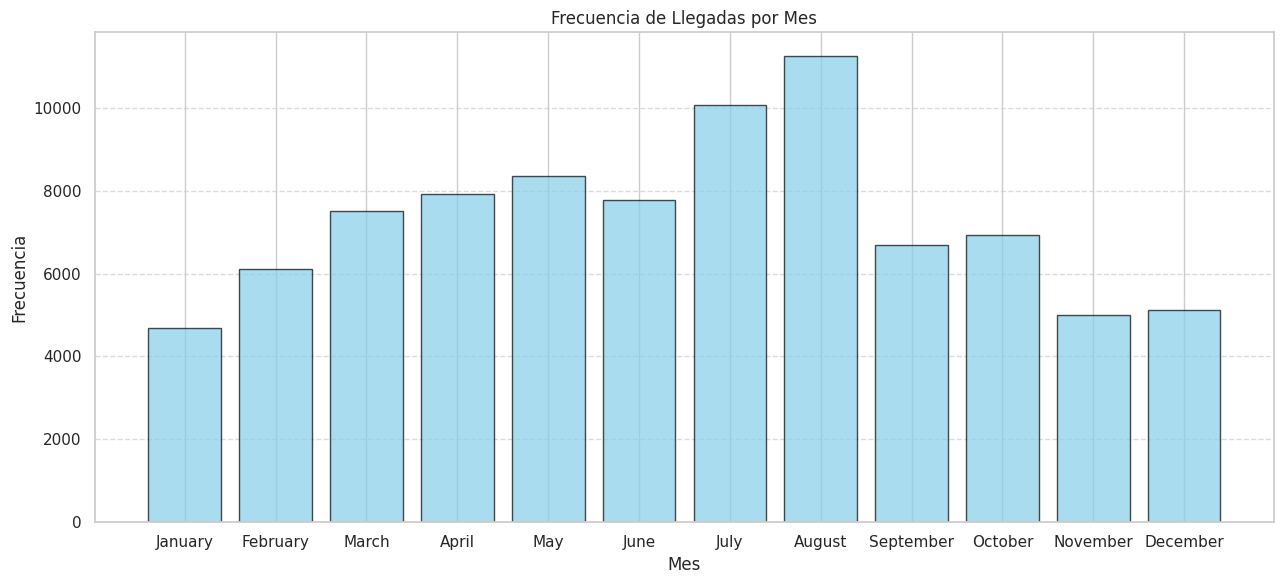

In [440]:
# Histograma de los meses con mas demanda
plt.figure(figsize=(13, 6))
month_counts = df['arrival_date_month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

month_counts = month_counts[month_order]

plt.bar(month_counts.index, month_counts.values, color='skyblue', edgecolor='black', alpha=0.7)

plt.title("Frecuencia de Llegadas por Mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Se muestra este grafico que el mes con mas demandas son julio y agosto

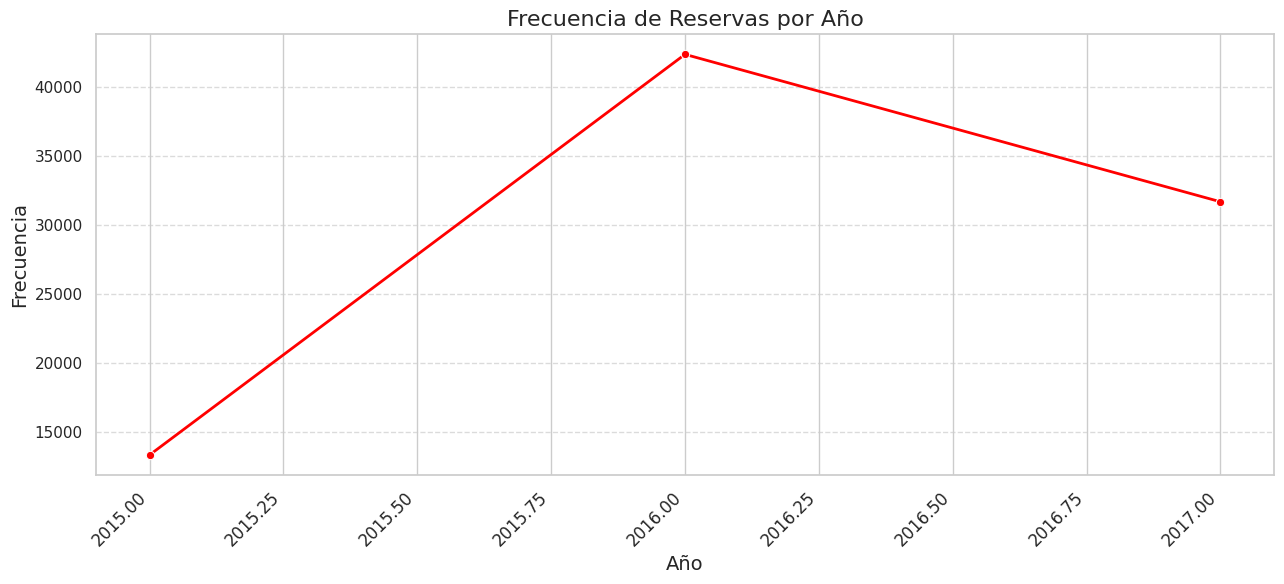

In [441]:
month_counts = df['reservation_status_date'].value_counts()


year_counts = df['arrival_date_year'].value_counts()
year_counts = year_counts.sort_index()

plt.figure(figsize=(13, 6))

sns.lineplot(x=year_counts.index, y=year_counts.values, color='red', marker='o', linewidth=2)

plt.title("Frecuencia de Reservas por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Se muestra este grafico que año con mas demanda fue 2016  

# Visualizaciones exploratorias multivariadas

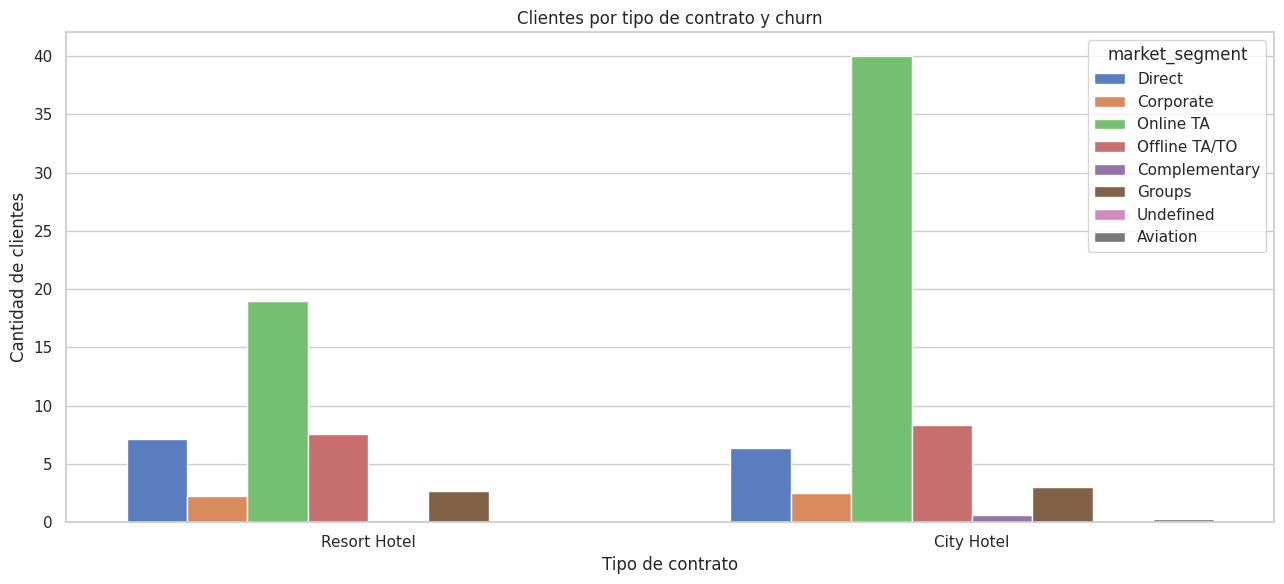

In [443]:

# Se uso seaborn para este ejercicio
# https://seaborn.pydata.org/generated/seaborn.countplot.html#

plt.figure(figsize=(13, 6))
sns.countplot(df, x="hotel", hue="market_segment", stat="percent")
plt.title("Clientes por tipo de contrato y churn")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()

En este grafico compara el segmento de mercado por los dos tipos de hoteles, en cual de reluce la gran diferencia en el uso de Online TA

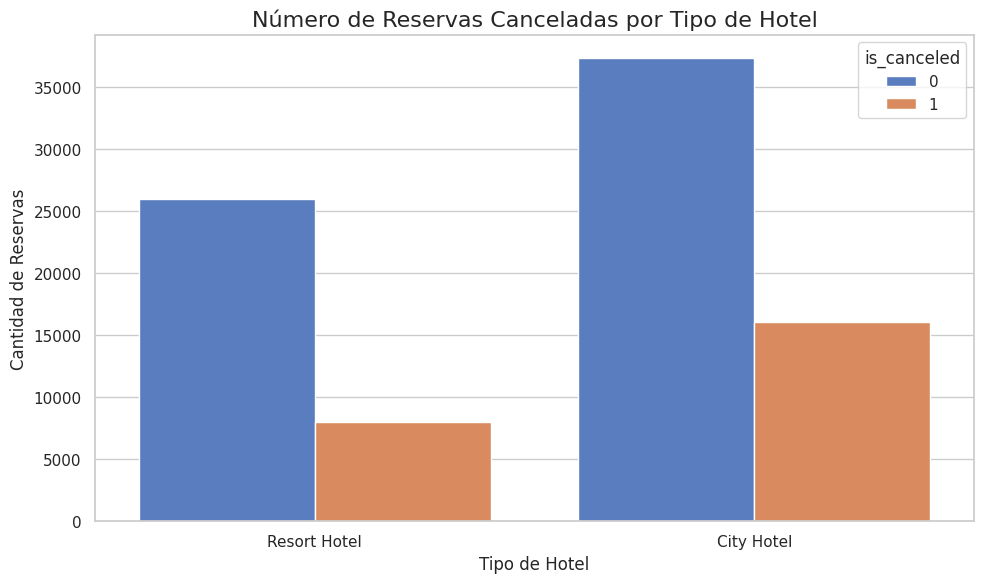

In [444]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="hotel", hue="is_canceled", palette="muted")

# Configurar título y etiquetas
plt.title("Número de Reservas Canceladas por Tipo de Hotel", fontsize=16)
plt.xlabel("Tipo de Hotel", fontsize=12)
plt.ylabel("Cantidad de Reservas", fontsize=12)

plt.tight_layout()
plt.show()

En este grafico podemos ver las diferebncia de cancelaciones entre hoteles

# Conclusion final de graficos



- El mes con mas demandas son julio y agosto
- El año con mas demanda fue 2016  
- el segmento de mercado mas usado fue Online TA
- En el City tiene muchos cancelaciones

Recomendacion : Enfocar esfuerzos en optimizar las relaciones con las agencias de viajes online (Online TA), gestionar de manera más eficiente las cancelaciones, y aprovechar la estacionalidad en meses clave como julio y agosto para mejorar la rentabilidad. Un análisis profundo de los factores detrás de las altas cancelaciones y el rendimiento de cada canal de venta te ayudará a tomar decisiones más estratégicas.